In [1]:
######################################################
#                       _oo0oo_                      #
#                      o8888888o                     #
#                      88" . "88                     #
#                      (| -_- |)                     #
#                      0\  =  /0                     #
#                    ___/`---'\___                   #
#                  .' \\|     |// '.                 #
#                 / \\|||  :  |||// \                #
#                / _||||| -:- |||||- \               #
#               |   | \\\  -  /// |   |              #
#               | \_|  ''\---/''  |_/ |              #
#               \  .-\__  '-'  ___/-. /              #
#             ___'. .'  /--.--\  `. .'___            #
#          ."" '<  `.___\_<|>_/___.' >' "".          #
#         | | :  `- \`.;`\ _ /`;.`/ - ` : | |        #
#         \  \ `_.   \_ __\ /__ _/   .-` /  /        #
#     =====`-.____`.___ \_____/___.-`___.-'=====     #
#                       `=---='                      #
#                                                    #
#                                                    #
#     ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    #
#                                                    #
#        Buddha Bless:   "No Bugs in my code"        #
#                                                    #
######################################################

import argparse
import time
import warnings

import torch

import utils
from data.preprocessing import toDataloader

warnings.filterwarnings("ignore")

#对应copy3超参数


parser = argparse.ArgumentParser()

#parser.add_argument('--dataset', type=str, default='ZTF_target(纯粹原始数据)-Copy1')#不要用ZTF_target(纯粹原始数据)，数据是错的
#parser.add_argument('--dataset', type=str, default='ZTF_target(改良型数据增强-仅训练集)')#不要用ZTF_target(纯粹原始数据)，数据是错的
#parser.add_argument('--dataset', type=str, default='ZTF_target(重组五分类)')
#parser.add_argument('--dataset', type=str, default='ZTF_target(五分类-非插值-多段)')
#parser.add_argument('--dataset', type=str, default='ZTF_target(三分类-上升段)')
#parser.add_argument('--dataset', type=str, default='插值六分类')
parser.add_argument('--dataset', type=str, default='ZTF_target(GP插值-full-data)')
#parser.add_argument('--dataset', type=str, default='ZTF_target(三分类-原始数据增强)')
parser.add_argument('--multi_group', type=list, default=[1],
                    help='Input list')  # group<=math.ceil(sqrt(seq_len))
parser.add_argument('--batch', type=int, default=4, help='Dataset batch')
parser.add_argument('--lr', type=float, default=0.0001)
#parser.add_argument('--nlayers', type=int, default=2)
parser.add_argument('--nlayers', type=int, default=2)
parser.add_argument('--emb_size', type=int, default=32)
parser.add_argument('--nhead', type=int, default=4)
parser.add_argument('--emb_size_c', type=int, default=32)
parser.add_argument('--masking_ratio', type=float, default=0.01)
parser.add_argument('--epochs', type=int, default=10)
parser.add_argument('--ratio_highest_attention', type=float, default=0.35)
#parser.add_argument('--dropout', type=float, default=0.01)
parser.add_argument('--dropout', type=float, default=0.01)
parser.add_argument('--nhid', type=int, default=32)
parser.add_argument('--nhid_c', type=int, default=32)



'''
#对应copy5那个取消位置编码情况下的最喜欢的模型（要改模型），以及copy5

parser = argparse.ArgumentParser()
#parser.add_argument('--dataset', type=str, default='ZTF_target(纯粹原始数据)-Copy1')#不要用ZTF_target(纯粹原始数据)，数据是错的
#parser.add_argument('--dataset', type=str, default='插值六分类')
#parser.add_argument('--dataset', type=str, default='ZTF_target(三分类-上升段)')
#parser.add_argument('--dataset', type=str, default='ZTF_target(五分类-插值-多段)')#不要用ZTF_target(纯粹原始数据)，数据是错的
#parser.add_argument('--dataset', type=str, default='ZTF_target(三分类-插值增强-比例)')
parser.add_argument('--dataset', type=str, default='ZTF_target(强插值)')
#默认是[1]，超参错了就调这里
parser.add_argument('--multi_group', type=list, default=[1,2],
                    help='Input list')  # group<=math.ceil(sqrt(seq_len))
parser.add_argument('--batch', type=int, default=8, help='Dataset batch')
parser.add_argument('--lr', type=float, default=0.0001)
parser.add_argument('--nlayers', type=int, default=2)
parser.add_argument('--emb_size', type=int, default=128)
parser.add_argument('--nhead', type=int, default=8)
parser.add_argument('--emb_size_c', type=int, default=128)
parser.add_argument('--masking_ratio', type=float, default=0.01)
parser.add_argument('--epochs', type=int, default=50)
parser.add_argument('--ratio_highest_attention', type=float, default=0.35)
#parser.add_argument('--dropout', type=float, default=0.01)
parser.add_argument('--dropout', type=float, default=0.05)
parser.add_argument('--nhid', type=int, default=128)
parser.add_argument('--nhid_c', type=int, default=128)
'''


'''
parser = argparse.ArgumentParser()
parser.add_argument('--dataset', type=str, default='ZTF_target(机器学习插值-数据增强-三分类)')
#parser.add_argument('--dataset', type=str, default='ZTF_target(改良型数据增强-防止泄露)')#不要用ZTF_target(纯粹原始数据)，数据是错的
parser.add_argument('--multi_group', type=list, default=[1,2],
                    help='Input list')  # group<=math.ceil(sqrt(seq_len))
parser.add_argument('--batch', type=int, default=4, help='Dataset batch')
parser.add_argument('--lr', type=float, default=0.0001)
parser.add_argument('--nlayers', type=int, default=2)
parser.add_argument('--emb_size', type=int, default=256)
parser.add_argument('--nhead', type=int, default=16)
parser.add_argument('--emb_size_c', type=int, default=256)
parser.add_argument('--masking_ratio', type=float, default=0.01)
parser.add_argument('--epochs', type=int, default=30)
parser.add_argument('--ratio_highest_attention', type=float, default=0.7)
#parser.add_argument('--dropout', type=float, default=0.01)
parser.add_argument('--dropout', type=float, default=0.01)
parser.add_argument('--nhid', type=int, default=256)
parser.add_argument('--nhid_c', type=int, default=256)
'''


args = parser.parse_args(args=[])
print(args)


def main():
    prop = utils.get_prop(args)
    prop['multi_group'] = [int(patch_index) for patch_index in prop['multi_group']]
    print('Data loading start...')
    X_train, y_train, X_test, y_test = utils.data_loader(args.dataset)
    
    
    
    #X_test, y_test, X_train, y_train = utils.data_loader(args.dataset)
   

    prop['batch_true'] = X_train.shape[0]
    print('Data loading complete...')

    print('Data preprocessing start...')
    #在进行迁移学习的时候，使用下面那一个函数        
    X_train_task, y_train_task, X_test, y_test,[mean_1,std_1] = utils.preprocess(X_train, y_train, X_test, y_test, prop)
    
    #_, _, _, _,[mean_1,std_1] = utils.preprocess(X_test, y_test, X_train, y_train, prop)
    print('原先的归一化常数 :',[mean_1,std_1])

    
    #X_train_task, y_train_task, X_test, y_test = utils.preprocess_1(X_train, y_train, X_test, y_test, prop,[mean_1,std_1])
    
    print('After standered:', X_train_task.shape, y_train_task.shape, X_test.shape, y_test.shape)
    print(X_train_task[0].shape)

    
    
    print('Data preprocessing complete...')

    # classes
    prop['nclasses'] = torch.max(y_train_task).item() + 1
    prop['dataset'], prop['seq_len'], prop['input_size'] = prop['dataset'], X_train_task.shape[1], X_train_task.shape[2]
    prop['device'] = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")

    # gain dataloader
    dataloader_train, dataloader_test = toDataloader(prop, X_train_task, y_train_task, X_test, y_test)

    #print(X_train_task.shape[1])
    
    print('Initializing model...')
    t = time.time()
    #在微调框架下，这里需要做一些调整
    #此外，记得调换上面的训练集和测试集的顺序
    model, criterion, optimizer = utils.initialize_training(prop)
    #以下内容，只有在微调的时候才添加
   
    model.load_state_dict(torch.load("test_model_ZTF.pth"))
    #model.load_state_dict(torch.load("data/ZTF_target(强插值)/test_model_ZTF-Copy1.pth"))
    model.train()
    #=============
    print('Model intialized...')

    print('Training start...')
    utils.training(model, optimizer, criterion, dataloader_train, dataloader_test, prop)
    t = time.time() - t
    print(f"\nTraining time: {t / prop['epochs']}\n")

    print('Training complete...')


if __name__ == "__main__":
    main()


Namespace(dataset='ZTF_target(GP插值-full-data)', multi_group=[1], batch=4, lr=0.0001, nlayers=2, emb_size=32, nhead=4, emb_size_c=32, masking_ratio=0.01, epochs=10, ratio_highest_attention=0.35, dropout=0.01, nhid=32, nhid_c=32)
Data loading start...
Data loading complete...
Data preprocessing start...
原先的归一化常数 : [array([25.39676965,  0.59871323, 26.52920202,  0.69004594]), array([13.12109795,  0.18821818, 14.38652556,  0.17582671])]
After standered: torch.Size([16673, 200, 4]) torch.Size([16673]) torch.Size([9010, 200, 4]) torch.Size([9010])
torch.Size([200, 4])
Data preprocessing complete...
Initializing model...
Model intialized...
Training start...

Training time: 0.10899827480316163

Training complete...


# 

In [17]:
#torch.save(model.state_dict(), "test_model_ZTF.pth")
#print("Model saved as 'test_model_ZTF.pth'")
import torch
torch.cuda.empty_cache()

Accuracy: 0.8891
F1 Score: 0.8813
Recall: 0.8891


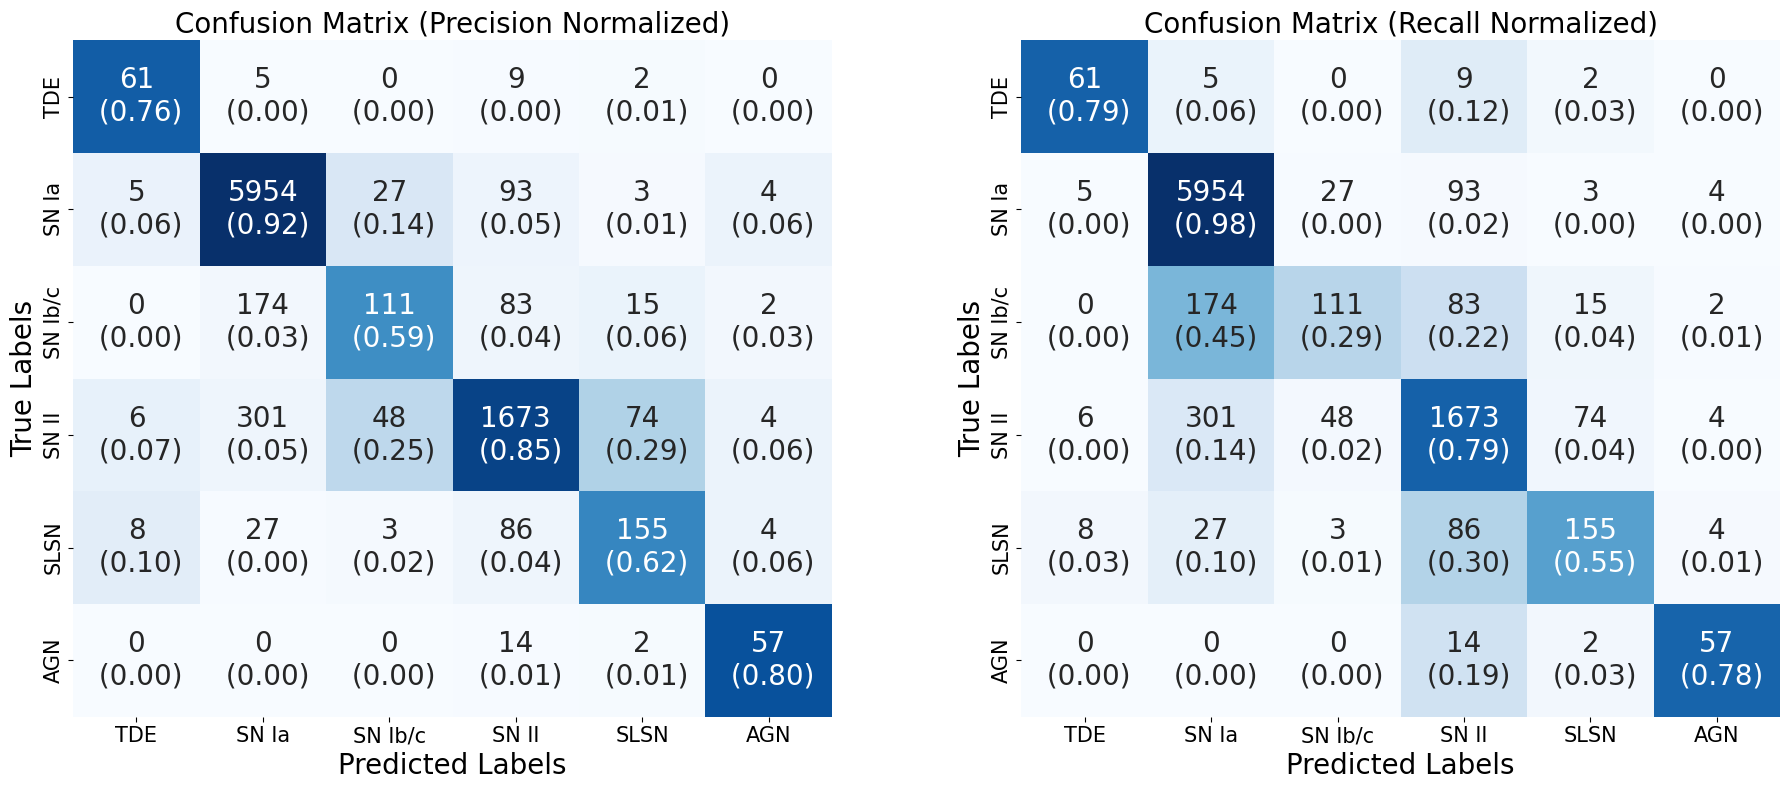

In [2]:
import math
import numpy as np
import random
import torch
import warnings
import utils

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from moudel.mgmcformer import MgMcFORMER

from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



prop = utils.get_prop(args)

prop['multi_group'] = [int(patch_index) for patch_index in prop['multi_group']]
X_train, y_train, X_test, y_test = utils.data_loader(args.dataset)

#print(X_test)

prop['batch_true'] = X_train.shape[0]
X_train_task, y_train_task, X_test, y_test,[mean_1,std_1] = utils.preprocess(X_train, y_train, X_test, y_test, prop)

#print(X_test[0])

prop['nclasses'] = torch.max(y_train_task).item() + 1
prop['dataset'], prop['seq_len'], prop['input_size'] = prop['dataset'], X_train_task.shape[1], X_train_task.shape[2]
prop['device'] = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")


model = MgMcFORMER(prop['multi_group'], prop['nclasses'], prop['seq_len'], prop['input_size'], prop['emb_size'], \
                       prop['nhid'], prop['emb_size_c'], prop['nhid_c'], prop['nhead'], prop['nlayers'], prop['device'],
                       prop['dropout']).to(prop['device'])

#print(X_test)



#checkpoint = torch.load("data/ZTF_target(纯粹原始数据)-Copy1/test_model_ZTF.pth")
#print(checkpoint.keys)

dataloader_train, dataloader_test = toDataloader(prop, X_train_task, y_train_task, X_test, y_test)
#model.load_state_dict(torch.load("data/ZTF_target(改良型数据增强-仅训练集)/test_model_ZTF-Copy1-超参2.pth"))
#model.load_state_dict(torch.load("data/ZTF_target(强插值)/test_model_ZTF-Copy1.pth"))
model.load_state_dict(torch.load("final_model_ZTF.pth"))
#model.load_state_dict(torch.load("./data/ZTF_target(机器学习插值-数据增强-六分类)/test_model_ZTF.pth"))
#model.load_state_dict(torch.load("data/限制点数的五分类/test_model_ZTF(二号超参1).pth"))
#model.load_state_dict(torch.load("data/ZTF_target(重组五分类)/test_model_ZTF-Copy2.pth"))
#model.load_state_dict(torch.load("data/ZTF_target(纯粹原始数据)-Copy1/test_model_ZTF-Copy5(第二套超参+删除位置编码，个人最喜欢的一个模型).pth"))
#model.load_state_dict(torch.load("效果比较好的模型/ZTF data/四分类-数据增强-TDE-AGN-SNIa-SNII.pth"))
#model.load_state_dict(torch.load("data/ZTF_target(纯粹原始数据)-Copy1/test_model_ZTF-Copy6(迁移学习2).pth"))
#model.load_state_dict(torch.load("data/ZTF_target(三分类-插值增强-比例1)/test_model_ZTF-Copy6.pth"))
#model.load_state_dict(torch.load("data/ZTF_target(纯粹原始数据)-Copy1/test_model_ZTF-Copy5(第二套超参+删除位置编码，个人最喜欢的一个模型).pth"))
model.eval()  # Set to evaluation mode




def test_model(model, dataloader_test, nclasses, device):
    model.eval()  # Turn on the evaluation mode

    output_arr = []
    label_arr = []
    with torch.no_grad():
        for data, label in dataloader_test:
            data = data.to(device)
            
            label = label.to(device)
            #print(data.shape)
            #print(model(data)[0].shape)
            pred = model(data)[0]
            
            output_arr.append(pred)
            label_arr.append(label)
            

    return label_arr,output_arr

nclasses=prop['nclasses']
label,output = test_model(model, dataloader_test, nclasses, device="cuda:0" )

#print(label)
#print(output)

# 将 labels 和 outputs 转换为 NumPy 数组
labels_np = torch.cat(label).cpu().numpy()
outputs_np = torch.argmax(torch.cat(output), dim=-1).cpu().numpy() 
logits = torch.cat(output)
probabilities = torch.softmax(logits, dim=-1)  # 转换为概率
#print(output)

#mask-filter
max_probs, predicted_classes = probabilities.max(dim=-1)
mask = max_probs > 0.01
#labels_np = labels_np[mask.cpu().numpy()]  # 只保留对应元素
#outputs_np = outputs_np[mask.cpu().numpy()]  # 同样筛选对应的预测


def prob_label_remix(probs,labels):
    for i in range(len(labels)):
        '''
        if probs[i][0] < 0.7 and probs[i][0] == np.max(np.array(probs[i].cpu())):
            # 获取两个最大值的下标
            top2_indices = probs[i].argsort()[-2:]
            # 最大的那个是最后一个，次大的那个是前一个
            second_max_index = top2_indices[0] if top2_indices[1] == 1 else top2_indices[1]
            labels[i] = second_max_index
        
        if probs[i][4]>=0.1:
            labels[i]=4
        '''
        if probs[i][0]>=0.05:
            labels[i]=0
        

        
        
        
        
       
       

    return labels
    pass


def wash_labels(labels,preds,probs):
    new_labels = [];new_preds = []
    for i in range(len(labels)):
        pro1 = np.array(probs[i].cpu())
        
        if np.max(np.array(probs[i].cpu()))>0.7:
            new_labels.append(labels[i])
            new_preds.append(preds[i])

    return new_labels,new_preds

labels_np = labels_np

#labels_np,outputs_np = wash_labels(labels_np,outputs_np,probabilities)
#outputs_np = prob_label_remix(probabilities,outputs_np)




'''
# 假设 labels_np 和 outputs_np 是已经准备好的 numpy 数组
# 计算精确度
accuracy = accuracy_score(labels_np, outputs_np)
print(f"Accuracy: {accuracy:.4f}")

# 计算 F1 分数
f1 = f1_score(labels_np, outputs_np, average='weighted')  # 可以选择 'micro', 'macro', 'weighted'
print(f"F1 Score: {f1:.4f}")

# 计算召回率
recall = recall_score(labels_np, outputs_np, average='weighted')
print(f"Recall: {recall:.4f}")

# 计算混淆矩阵
cm = confusion_matrix(labels_np, outputs_np)

# 归一化 - 精确度归一化 (按列归一化)
cm_precision = cm.astype('float') / cm.sum(axis=0, keepdims=True)

# 归一化 - 召回率归一化 (按行归一化)
cm_recall = cm.astype('float') / cm.sum(axis=1, keepdims=True)
label_map = {0: "TDE", 1: "SN Ia", 2: "SN II"} 
# 绘制精确度归一化后的混淆矩阵
plt.figure(figsize=(10, 16))

# 精确度归一化的热图
plt.subplot(2, 1, 1)
# 计算每个元素的文本，格式为 "(原始值, 归一化值)"
annot_text = [[f"{cm[i, j]}\n ({cm_precision[i, j]:.2f})" for j in range(cm.shape[1])] for i in range(cm.shape[0])]
sns.heatmap(cm_precision, annot=annot_text, fmt="", cmap="Blues", xticklabels=np.unique(labels_np), yticklabels=np.unique(labels_np))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Precision Normalized)')

# 召回率归一化的热图
plt.subplot(2, 1, 2)
# 计算每个元素的文本，格式为 "(原始值, 归一化值)"
annot_text = [[f"{cm[i, j]}\n ({cm_recall[i, j]:.2f})" for j in range(cm.shape[1])] for i in range(cm.shape[0])]
sns.heatmap(cm_recall, annot=annot_text, fmt="", cmap="Blues", xticklabels=np.unique(labels_np), yticklabels=np.unique(labels_np))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Recall Normalized)')

plt.tight_layout()
plt.show()
'''

# 数据准备

#directories = ['TDE',  'SN Ia',  'SN Ib', 'SN Ic',  'SN II', 'SN IIb',  'SN IIn', 'SN IIP',  ]
#directories = ['TDE',  'SN I',  'SN II'  ]
directories = ['TDE',  'SN Ia','SN Ib/c', 'SN II','SLSN','AGN'  ]
#directories = ['TDE',  'SN Ia', 'SN II' ]
#directories = ['TDE',  'SN Ia', 'SN II' ]
#directories = ['TDE',  'SN Ia',  'SN IIb','SN IIn','SN IIP','AGN'  ]
#directories = ['TDE',  'Not-TDE'  ]
#labels = [0, 1, 2]
#labels = [0,1]
#labels = [0,1,2]
#directories = ['TDE','Not TDE']
#directories = ['TDE','SN Ia', 'SN II']

#directories = ['TDE','SN Ia', 'SN II','other SN']

#labels = [0, 1, 2]
labels = [0, 1, 2 , 3, 4,5]

# 构建映射关系
label_map = {labels[i]: directories[i] for i in range(len(labels))}

# 假设有真实标签和预测结果


# 计算性能指标
accuracy = accuracy_score(labels_np, outputs_np)
f1 = f1_score(labels_np, outputs_np, average='weighted')
recall = recall_score(labels_np, outputs_np, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

# 计算混淆矩阵
cm = confusion_matrix(labels_np, outputs_np)

# 归一化处理
cm_precision = cm.astype('float') / cm.sum(axis=0, keepdims=True)
cm_recall = cm.astype('float') / cm.sum(axis=1, keepdims=True)

# 绘制热图
plt.figure(figsize=(18, 8))

# 精确度归一化
plt.subplot(1, 2, 1)
annot_text = [[f"{cm[i, j]}\n ({cm_precision[i, j]:.2f})" if cm[j, :].sum() != 0 else f"{cm[i, j]}\n (N/A)" 
               for j in range(cm.shape[1])] for i in range(cm.shape[0])]
ax = sns.heatmap(cm_precision, annot=annot_text, fmt="", cmap="Blues", cbar=False,
            xticklabels=[label_map.get(i, i) for i in np.unique(labels_np)], 
            yticklabels=[label_map.get(i, i) for i in np.unique(labels_np)],
            annot_kws={"size": 20})
ax.tick_params(axis='x', labelsize=15)  # x轴标签字体大小
ax.tick_params(axis='y', labelsize=15)  # y轴标签字体大小
plt.xlabel('Predicted Labels',fontsize=20)
plt.ylabel('True Labels',fontsize=20)
plt.title('Confusion Matrix (Precision Normalized)',fontsize=20)

# 召回率归一化
plt.subplot(1, 2, 2)
annot_text = [[f"{cm[i, j]}\n ({cm_recall[i, j]:.2f})" if cm[i, :].sum() != 0 else f"{cm[i, j]}\n (N/A)" 
               for j in range(cm.shape[1])] for i in range(cm.shape[0])]
ax = sns.heatmap(cm_recall, annot=annot_text, fmt="", cmap="Blues", cbar=False,
            xticklabels=[label_map.get(i, i) for i in np.unique(labels_np)], 
            yticklabels=[label_map.get(i, i) for i in np.unique(labels_np)],
           annot_kws={"size": 20})
ax.tick_params(axis='x', labelsize=15)  # x轴标签字体大小
ax.tick_params(axis='y', labelsize=15)  # y轴标签字体大小

plt.xlabel('Predicted Labels',fontsize=20)
plt.ylabel('True Labels',fontsize=20)
#plt.title('Confusion Matrix (Recall Normalized) - score>0.05',fontsize=20)
plt.title('Confusion Matrix (Recall Normalized)',fontsize=20)

plt.tight_layout()
plt.subplots_adjust(wspace=0.25, hspace=0.4)
plt.savefig('model_another_s10.png')
plt.show()

0.7866666666666666
0.7662337662337663
0.7763157894736841
0.7866666666666666
0.7662337662337663
0.7763157894736841


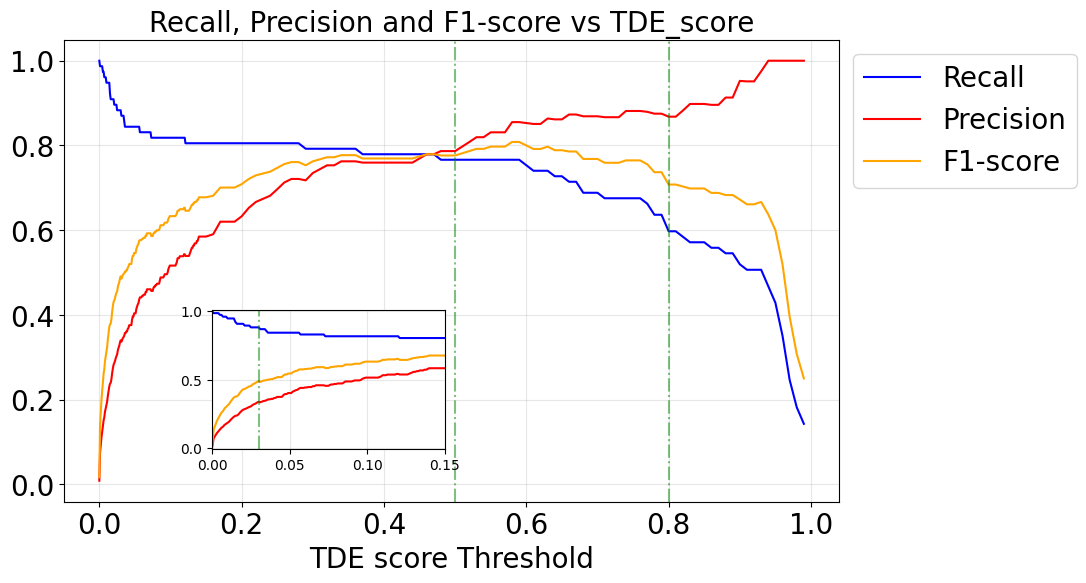

'\n# 创建嵌入轴\ninset_ax1 = inset_axes(ax, width="30%", height="30%", loc=\'lower right\', bbox_to_anchor=(-0.1, 0.1,1,1),bbox_transform=ax.transAxes)\nzoom_thresholds = thresholds[thresholds < 0.98] \n\nzoom_recalls = recalls[len(zoom_thresholds):]  # 对应区间的 Recall\nzoom_precisions = precisions[len(zoom_thresholds):]  # 对应区间的 Precision\nzoom_thresholds = thresholds[thresholds >= 0.98] \n\n# 绘制局部放大图\ninset_ax1.plot(zoom_thresholds, zoom_recalls, label="Recall", color=\'blue\')\ninset_ax1.plot(zoom_thresholds, zoom_precisions, label="Precision", color=\'red\')\ninset_ax1.set_xlim(0.98, 1.00)\ninset_ax1.set_ylim(min(min(zoom_recalls), min(zoom_precisions)) - 0.01, 1.01)\ninset_ax1.axvline(0.998,linestyle=\'--\',alpha=0.5,color=\'y\')\ninset_ax1.axvline(0.995,linestyle=\'--\',alpha=0.5,color=\'g\')\n\ninset_ax1.tick_params(axis=\'both\', which=\'major\', labelsize=8)\ninset_ax1.grid(alpha=0.3)\n'

In [75]:
# 将 labels 和 probabilities 转换为 NumPy 数组
labels_np = torch.cat(label).cpu().numpy()  # 真实标签
outputs_np = torch.argmax(torch.cat(output), dim=-1).cpu().numpy() 
logits = torch.cat(output)
probabilities = torch.softmax(logits, dim=-1).to('cpu')  # 转换为概率


# 定义阈值范围
thresholds_1 = np.arange(0.0, 0.15, 0.001)  # 0 到 0.02 之间，精度为 0.0001
thresholds_2 = np.arange(0.98, 0.99, 0.01)  # 0.98 到 1 之间，精度为 0.0001
thresholds_3 = np.arange(0.15, 0.98, 0.01)  # 0.02 到 0.98 之间，精度为 0.01

# 合并所有阈值
thresholds = np.concatenate([thresholds_1, thresholds_3, thresholds_2])
recalls, precisions, f1_scores = [], [], []

# 遍历不同的阈值
for threshold in thresholds:
    # 向量化构造 adjusted_labels：如果 class 0 概率 ≥ threshold，则预测为 0，否则为 1
    adjusted_labels = np.where(probabilities[:, 0] >= threshold, 0, 1)

    # 构造二分类 ground truth：目标是识别 class 0
    binary_true = (labels_np == 0).astype(int)
    binary_pred = (adjusted_labels == 0).astype(int)

    # TP, FP, FN
    tp = np.sum((binary_true == 1) & (binary_pred == 1))
    fp = np.sum((binary_true == 0) & (binary_pred == 1))
    fn = np.sum((binary_true == 1) & (binary_pred == 0))

    # Precision, Recall, F1
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

    if abs(threshold-0.5)<0.01:
        print(precision)
        print(recall)
        print(f1)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
'''
# 绘制 Recall 和 Precision 随阈值变化的曲线
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label="Recall (Class 0)", color='blue')
plt.plot(thresholds, precisions, label="Precision (Class 0)", color='orange')
plt.xlabel("Threshold", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.title("Recall and Precision vs Threshold (Class 0)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()
'''

#print(thresholds[thresholds <= 0.02])
#print(thresholds[thresholds >= 0.98])

# 主图
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(thresholds, recalls, label="Recall", color='blue')
ax.plot(thresholds, precisions, label="Precision", color='red')
ax.plot(thresholds, f1_scores, label="F1-score", color='orange')
ax.set_xlabel("TDE score Threshold", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.axvline(0.5,linestyle='-.',alpha=0.5,color='g')# F1_score = 0.5
ax.axvline(0.8,linestyle='-.',alpha=0.5,color='g')# F1_score = 0.5

#ax.axhline(0.5,linestyle='--',alpha=0.5,color='black')#  0.5
#ax.axvline(0.92,linestyle='-.',alpha=0.5,color='g')# recall = 0.5

ax.set_title("Recall, Precision and F1-score vs TDE_score", fontsize=20)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize=20)
ax.grid(alpha=0.3)




# 局部放大图
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

inset_ax = inset_axes(ax, width="30%", height="30%", loc='lower right', bbox_to_anchor=(-0.5, 0.1, 1, 1), bbox_transform=ax.transAxes)
zoom_thresholds = thresholds[thresholds <= 0.15]
zoom_recalls = recalls[:len(zoom_thresholds)]
zoom_precisions = precisions[:len(zoom_thresholds)]
zoom_f1 = f1_scores[:len(zoom_thresholds)]

inset_ax.plot(zoom_thresholds, zoom_recalls, label="Recall", color='blue')
inset_ax.plot(zoom_thresholds, zoom_precisions, label="Precision", color='red')
inset_ax.plot(zoom_thresholds, zoom_f1, label="F1-score", color='orange')
inset_ax.set_xlim(0, 0.15)
inset_ax.set_ylim(min(min(zoom_recalls), min(zoom_precisions), min(zoom_f1)) - 0.01, 1.01)
inset_ax.tick_params(axis='both', which='major', labelsize=10)
inset_ax.grid(alpha=0.3)

#inset_ax.axhline(0.5,linestyle='--',alpha=0.5,color='black')#  0.5
#inset_ax.axvline(0.09,linestyle='-.',alpha=0.5,color='g')# Precision = 0.5
inset_ax.axvline(0.03,linestyle='-.',alpha=0.5,color='g')# F1_score = 0.5

plt.savefig('Recall_Precision_F1_vs_TDE_score-2.png', bbox_inches='tight')
plt.show()

"""
# 创建嵌入轴
inset_ax1 = inset_axes(ax, width="30%", height="30%", loc='lower right', bbox_to_anchor=(-0.1, 0.1,1,1),bbox_transform=ax.transAxes)
zoom_thresholds = thresholds[thresholds < 0.98] 

zoom_recalls = recalls[len(zoom_thresholds):]  # 对应区间的 Recall
zoom_precisions = precisions[len(zoom_thresholds):]  # 对应区间的 Precision
zoom_thresholds = thresholds[thresholds >= 0.98] 

# 绘制局部放大图
inset_ax1.plot(zoom_thresholds, zoom_recalls, label="Recall", color='blue')
inset_ax1.plot(zoom_thresholds, zoom_precisions, label="Precision", color='red')
inset_ax1.set_xlim(0.98, 1.00)
inset_ax1.set_ylim(min(min(zoom_recalls), min(zoom_precisions)) - 0.01, 1.01)
inset_ax1.axvline(0.998,linestyle='--',alpha=0.5,color='y')
inset_ax1.axvline(0.995,linestyle='--',alpha=0.5,color='g')

inset_ax1.tick_params(axis='both', which='major', labelsize=8)
inset_ax1.grid(alpha=0.3)
"""

# 显示图像
# plt.savefig('Recall and Precision vs TDE_score_for_M71.png')
# plt.show()


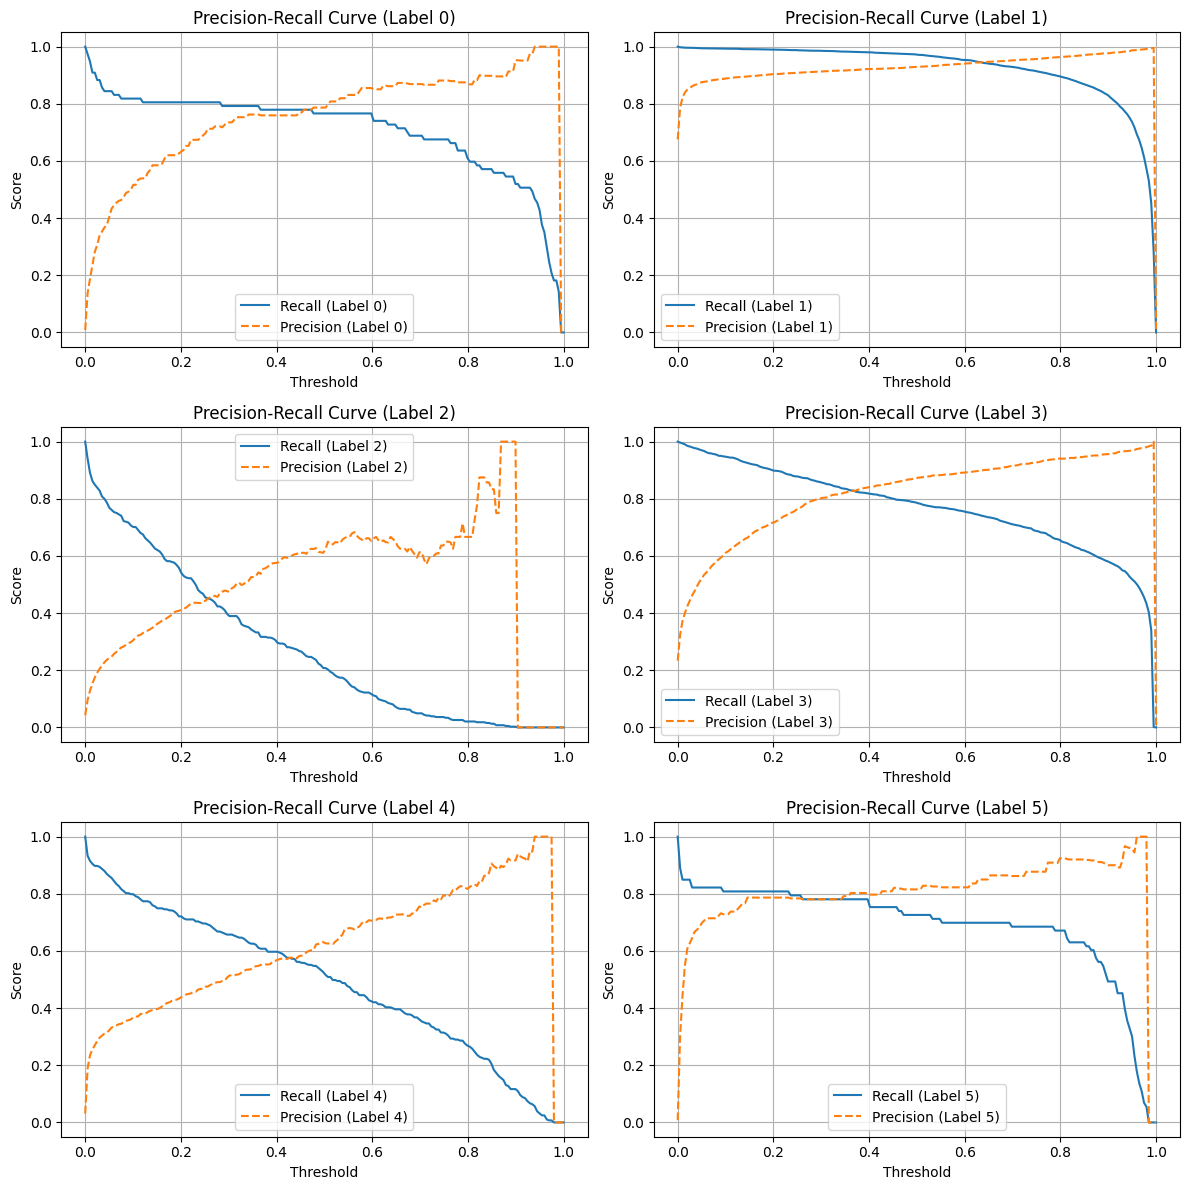

In [73]:
import numpy as np
import torch
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_multi_label_precision_recall_curve(
    label_list,
    output_list,
    target_labels,
    num_thresholds=200,
    plot=True,
    separate_plots=False
):
    """
    计算并绘制多个 target_label 的 Precision 和 Recall 随概率阈值变化的曲线。

    参数:
    - label_list: list of torch.Tensor，真实标签
    - output_list: list of torch.Tensor，模型输出（logits）
    - target_labels: list of int，待分析的类别
    - num_thresholds: int，阈值数量（精度）
    - plot: bool，是否画图
    - separate_plots: bool，是否每个类别单独画图

    返回:
    - results: dict，每个 label 下对应的 (thresholds, precisions, recalls)
    """
    
    labels_np = torch.cat(label_list).cpu().numpy()
    logits = torch.cat(output_list)
    probabilities = torch.softmax(logits, dim=-1).cpu().numpy()
    outputs_np = np.argmax(probabilities, axis=-1)

    thresholds = np.linspace(0.0, 1.0, num_thresholds)
    results = {}

    for target_label in target_labels:
        recalls = []
        precisions = []

        for threshold in thresholds:
            adjusted_labels = outputs_np.copy()
            for i in range(len(adjusted_labels)):
                if probabilities[i][target_label] >= threshold:
                    adjusted_labels[i] = target_label
                else:
                    adjusted_labels[i] = -1  # 非目标类

            binary_true = (labels_np == target_label).astype(int)
            binary_pred = (adjusted_labels == target_label).astype(int)

            cm = confusion_matrix(binary_true, binary_pred, labels=[0, 1])
            cm_precision = cm.astype('float') / cm.sum(axis=0, keepdims=True)
            cm_recall = cm.astype('float') / cm.sum(axis=1, keepdims=True)

            precision = cm_precision[1, 1] if not np.isnan(cm_precision[1, 1]) else 0.0
            recall = cm_recall[1, 1] if not np.isnan(cm_recall[1, 1]) else 0.0

            precisions.append(precision)
            recalls.append(recall)

        results[target_label] = (thresholds, np.array(precisions), np.array(recalls))

    # 可视化
    if plot:
        if separate_plots:
            num_labels = len(target_labels)
            ncols = 2
            nrows = int(np.ceil(num_labels / ncols))
            fig, axs = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))

            axs = axs.flatten() if num_labels > 1 else [axs]

            for idx, target_label in enumerate(target_labels):
                t, p, r = results[target_label]
                ax = axs[idx]
                ax.plot(t, r, label=f'Recall (Label {target_label})')
                ax.plot(t, p, '--', label=f'Precision (Label {target_label})')
                ax.set_title(f"Precision-Recall Curve (Label {target_label})")
                ax.set_xlabel("Threshold")
                ax.set_ylabel("Score")
                ax.legend()
                ax.grid(True)

            # 清理多余的子图
            for i in range(len(target_labels), len(axs)):
                fig.delaxes(axs[i])

            plt.tight_layout()
            plt.show()

        else:
            plt.figure(figsize=(10, 6))
            for target_label in target_labels:
                t, p, r = results[target_label]
                plt.plot(t, r, label=f'Recall (Label {target_label})')
                plt.plot(t, p, '--', label=f'Precision (Label {target_label})')
            plt.title("Precision-Recall Curves")
            plt.xlabel("Threshold")
            plt.ylabel("Score")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    return results


res = plot_multi_label_precision_recall_curve(label, output, target_labels=[0,1,2,3,4,5], separate_plots=True)

## vs code plot

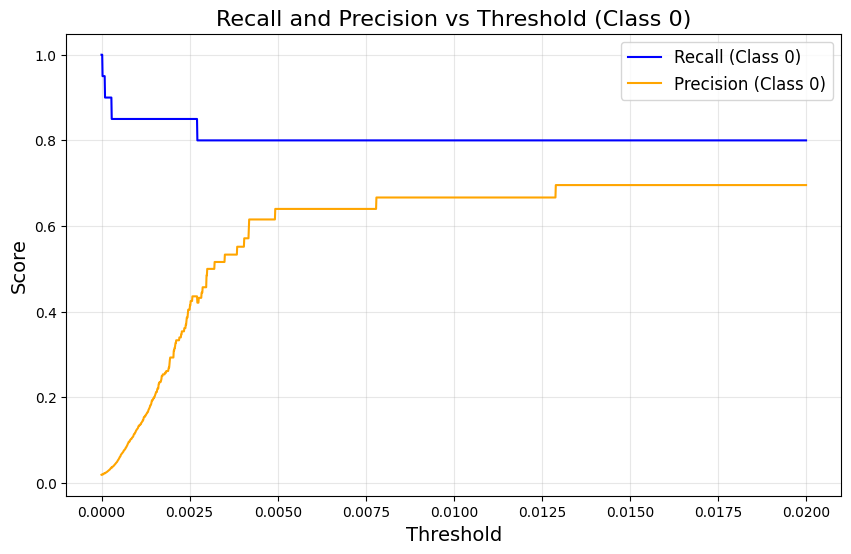

In [49]:
thresholds = np.arange(0.0, 0.02, 0.00001)  # 阈值范围 [0, 1]，步长为 0.001
recalls = []
precisions = []

# 遍历不同的阈值
for threshold in thresholds:
    # 调整输出标签
    adjusted_labels = outputs_np.copy()  # 创建副本以便调整
    for i in range(len(adjusted_labels)):
        if probabilities[i][0] >= threshold:  # 根据阈值调整标签
            adjusted_labels[i] = 0
            #print('xx')
        else:
            adjusted_labels[i] = 1            

    # 归一化混淆矩阵
    
    cm = confusion_matrix(labels_np, adjusted_labels)
    cm_precision = cm.astype('float') / cm.sum(axis=0, keepdims=True)  # 按列归一化
    cm_recall = cm.astype('float') / cm.sum(axis=1, keepdims=True)  # 按行归一化

    # 提取分类 0 的 Precision 和 Recall
    precision = cm_precision[0, 0] if not np.isnan(cm_precision[0, 0]) else 0.0
    recall = cm_recall[0, 0] if not np.isnan(cm_recall[0, 0]) else 0.0

    precisions.append(precision)
    recalls.append(recall)

# 绘制 Recall 和 Precision 随阈值变化的曲线
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label="Recall (Class 0)", color='blue')
plt.plot(thresholds, precisions, label="Precision (Class 0)", color='orange')
plt.xlabel("Threshold", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.title("Recall and Precision vs Threshold (Class 0)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 如果专注TDE的分类

Accuracy: 0.9961
F1 Score: 0.9962
Recall: 0.9961


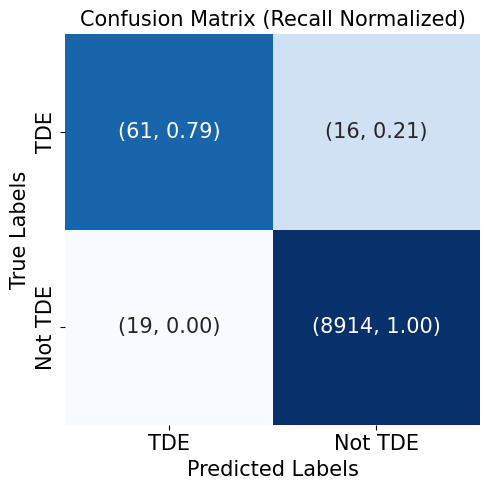

In [13]:
## import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

# 合并 2 到 8 类为一个新的类别 3
def merge_classes(labels):
    merged_labels = np.copy(labels)
    merged_labels[(labels >= 1) & (labels <= 8)] = 1  # 将 2-8 类标记为 3 类
    return merged_labels


# 假设 labels_np 和 outputs_np 已经是 numpy 数组
labels_np_merged = merge_classes(labels_np)
outputs_np_merged = merge_classes(outputs_np)

labels_display = ['TDE', 'Not TDE']

# 计算精确度
accuracy = accuracy_score(labels_np_merged, outputs_np_merged)
print(f"Accuracy: {accuracy:.4f}")

# 计算 F1 分数
f1 = f1_score(labels_np_merged, outputs_np_merged, average='weighted')  # 可以选择 'micro', 'macro', 'weighted'
print(f"F1 Score: {f1:.4f}")

# 计算召回率
recall = recall_score(labels_np_merged, outputs_np_merged, average='weighted')
print(f"Recall: {recall:.4f}")

# 计算混淆矩阵
cm = confusion_matrix(labels_np_merged, outputs_np_merged)

# 归一化 - 精确度归一化 (按列归一化)
cm_precision = cm.astype('float') / cm.sum(axis=0, keepdims=True)

# 归一化 - 召回率归一化 (按行归一化)
cm_recall = cm.astype('float') / cm.sum(axis=1, keepdims=True)

# 绘制精确度归一化和召回率归一化的混淆矩阵
plt.figure(figsize=(5, 5))

labels_display = ['TDE', 'Not TDE']

# 精确度归一化的热图
'''
plt.subplot(1, 1, 1)
annot_text = [[f"({cm[i, j]}, {cm_precision[i, j]:.2f})" for j in range(cm.shape[1])] for i in range(cm.shape[0])]
sns.heatmap(cm_precision, annot=annot_text, fmt="", cmap="Blues",
            xticklabels=labels_display, yticklabels=labels_display, cbar=False,annot_kws={"size": 15})
plt.xlabel('Predicted Labels',fontsize=15)
plt.ylabel('True Labels',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix (Precision Normalized)',fontsize=15)
plt.savefig('model_another_s11-1-pre.png',bbox_inches='tight', dpi=300)
plt.show()
'''

# 召回率归一化的热图

plt.subplot(1, 1, 1)
annot_text = [[f"({cm[i, j]}, {cm_recall[i, j]:.2f})" for j in range(cm.shape[1])] for i in range(cm.shape[0])]
sns.heatmap(cm_recall, annot=annot_text, fmt="", cmap="Blues",
            xticklabels=labels_display, yticklabels=labels_display, cbar=False,annot_kws={"size": 15} )
plt.xlabel('Predicted Labels',fontsize=15)
plt.ylabel('True Labels',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix (Recall Normalized)',fontsize=15)

plt.tight_layout()
plt.savefig('model_another_s11-1-rec.png',bbox_inches='tight', dpi=300)
plt.show()


# Apply for WFST

#### 可能会用到的插值函数，实际上效果感觉很一般，只在参数化方法中使用，实际上还是很难去改变什么


In [182]:
#这个方法理论上应该很有用，但是，现在的工作重点是上升段
#不过，上升段，就一定不能使用吗？或许有用呢

from scipy.optimize import curve_fit

# 定义高斯函数
def gaussian(x, mu, sigma,amp):
    return amp * np.exp(-(x - mu)**2 / (2 * sigma**2))

#定义指数函数
def exp(x,tau,t0,amp):
    return amp * np.exp((x - t0)/tau)

def gauss_and_exp(x, sigma,tau,t0,amp,C):
    import numpy as np
    return np.piecewise(x, [x<=t0,x>t0], [lambda x:gaussian(x, t0,sigma,amp)+C
                                          ,lambda x:exp(x, tau, t0,amp)+C])


def gauss_and_exp_fitting(time,flux,t0,Flag,f_max,C=0,tau0=-20,sigma0=20):

   
    tau = tau0#这个时标指代的是peak之后多少天，该源的流量下降到原先的三分之一
    f_max = abs(f_max)
    #print('t0 = ',t0)
    
    
    sigma = sigma0
    
    initial_para = [sigma,tau,t0,f_max,0]
    if Flag == 1:
        bounds = ([1,-1000,t0-100,f_max,-0.1],[10**1.5,-1,t0+100,f_max*10,0.1])
    if Flag == 0:
        bounds = ([sigma-10,-1000,t0-0.5,f_max*0.1,-0.1],[sigma+10,-1,t0+0.5,f_max*5,0.1])
    
    
    params,pcov = curve_fit(gauss_and_exp, time, flux, p0 = initial_para,maxfev=10000,bounds=bounds)
    
    residuals = flux - gauss_and_exp(time, *params)
    r_squared = 1 - np.var(residuals) / np.var(flux)
    
    return r_squared,params,pcov


def fit_and_inter(time_g,flux_g,time_r,flux_r):

    t0_g = time_g[np.where(flux_g == np.max(flux_g))[0][0]]        
    t0_r = time_r[np.where(flux_r == np.max(flux_r))[0][0]]   
    t0 = np.mean([t0_g,t0_r])

    flux_max = min(np.max(flux_g),np.max(flux_r))
    
    if len(time_g)>len(time_r):    
        r_squared_g,para_g,pcov_g = gauss_and_exp_fitting(time_g, flux_g,t0,Flag = 1,f_max=flux_max)
        t0 = para_g[2]
        r_squared_r,para_r,pcov_r = gauss_and_exp_fitting(time_r, flux_r,t0,Flag = 0,f_max=para_g[3],tau0 = para_g[1],sigma0 = para_g[0])
    else:
        r_squared_r,para_r,pcov_r = gauss_and_exp_fitting(time_r, flux_r,t0,Flag = 1,f_max=flux_max)
        t0 = para_r[2]
        r_squared_g,para_g,pcov_g = gauss_and_exp_fitting(time_g, flux_g,t0,Flag = 0,f_max=para_r[3],tau0 = para_r[1],sigma0 = para_r[0])

    t_lin = np.linspace(min(time_g[0],time_r[0]), max(time_g[-1],time_r[-1]),200)

    flux_g_fitted = gauss_and_exp(t_lin, *para_g)
    flux_r_fitted = gauss_and_exp(t_lin, *para_r)

    return t_lin,flux_g_fitted,flux_r_fitted
         

In [16]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from scipy.interpolate import PchipInterpolator


#模型加载，只要数据输入为5维均可
#model = MgMcFORMER(prop['multi_group'], 3, prop['seq_len'], prop['input_size'], prop['emb_size'], \
#                       prop['nhid'], prop['emb_size_c'], prop['nhid_c'], prop['nhead'], prop['nlayers'], prop['device'],
#                       prop['dropout']).to(prop['device'])

#model.load_state_dict(torch.load("test_model_ZTF.pth"))
#model.load_state_dict(torch.load("data/ZTF-12-(3)-未做数据增强/test_model_ZTF.pth"))
#model.load_state_dict(torch.load("data/ZTF-9(常规四分)/test_model_ZTF.pth"))
#model.load_state_dict(torch.load("data/ZTF-9(常规四分)/test_model_ZTF.pth"))
#model.load_state_dict(torch.load("效果比较好的模型/ZTF data/四分类-数据增强-TDE-AGN-SNIa-SNII.pth"))
#model.load_state_dict(torch.load("data/ZTF-12-(3)-未做数据增强/test_model_ZTF.pth"))
#model.load_state_dict(torch.load("效果比较好的模型/ZTF data/三分类-F1-92-流量归一化，输入维度5.pth"))
#model.load_state_dict(torch.load("data/ZTF-8(rising)/test_model_ZTF.pth"))


model.eval()  # Set to evaluation mode

def mean_standardize_fit(X):
    m1 = np.mean(X, axis=1)
    mean = np.mean(m1, axis=0)

    s1 = np.std(X, axis=1)
    std = np.mean(s1, axis=0)

    return mean, std


def mean_standardize_transform(X, mean, std):
    return (X - mean) / std


def preprocess(X_train,mean,std):
    mean, std = mean,std
    X_train = mean_standardize_transform(X_train, mean, std)

    X_train_task = torch.as_tensor(X_train).float()
    

    return X_train_task

import os
def WFST_path_reading_single(filename,model,rising_stage = False):
    # 读取txt文件
    file_path = filename  # 替换为你的txt文件路径
    data = []
    
    # 读取文件并提取数据
    with open(file_path, 'r') as file:
        for line in file:
            # 跳过前面注释行
            if line.startswith('#'):
                continue
            
            # 分割每行数据
            split_line = line.split()
            if len(split_line) < 4:
                continue
            
            mjd = float(split_line[0])
            flux = float(split_line[1])
            flux_err = float(split_line[2])
            band = split_line[3]
            
            # 只关注g和r波段的流量
            if band == 'g' or band == 'r':
                data.append([mjd, flux,flux_err, band])
    
    # 将数据转换为DataFrame，方便操作
    df = pd.DataFrame(data, columns=['MJD', 'Flux','Flux_err', 'Band'])
    
    # 分离g和r波段的数据
    g_data = df[df['Band'] == 'g']
    r_data = df[df['Band'] == 'r']
    
    # 确保时间排序
    g_data = g_data.sort_values(by='MJD')
    r_data = r_data.sort_values(by='MJD')
    
    # 去除负值点
    g_data = g_data[g_data['Flux'] > 0]
    r_data = r_data[r_data['Flux'] > 0]
    
    # 获取g和r波段的时间和流量
    time_g = g_data['MJD'].values
    flux_g = g_data['Flux'].values
    
    time_r = r_data['MJD'].values
    flux_r = r_data['Flux'].values

    flux_g_err = g_data['Flux_err'].values
    flux_r_err = r_data['Flux_err'].values

    tg = [];fg = [];tr = [];fr = []

    for i in range(len(time_g)):
        if flux_g[i]/flux_g_err[i]>5:
            tg.append(time_g[i]);fg.append(flux_g[i])

    for i in range(len(time_r)):
        if flux_r[i]/flux_r_err[i]>5:
            tr.append(time_r[i]);fr.append(flux_r[i])
            
    time_g,time_r,flux_g,flux_r = np.array(tg),np.array(tr),np.array(fg),np.array(fr)

    
        
    
    # 对时间的最大值和最小值进行插值，使长度为200
    time_min = min(time_g.min(), time_r.min())
    time_max = max(time_g.max(), time_r.max())

    if rising_stage == True:
        
        # 对于上升段，需要取用观测开始之后15天内的数据，且需要卡住信噪比
        # 对于g波段
        valid_time_g = time_g <= np.inf
        time_g = time_g[valid_time_g]
        flux_g = flux_g[valid_time_g]
    
        # 对于r波段
        valid_time_r = time_r <= np.inf
        time_r = time_r[valid_time_r]
        flux_r = flux_r[valid_time_r]
        
        time_min = max(time_g.min(), time_r.min())
        time_max = min(time_g.max(), time_r.max())  
        
    
        new_time_g = np.linspace(time_min, time_min+10, 200)
        new_time_r = np.linspace(time_min, time_min+10, 200)
    else:
        min_max_time = min(np.max(time_r),np.max(time_g))
        max_min_time = max(np.min(time_r),np.min(time_g))
        new_time = np.linspace(max_min_time, min_max_time, 200)
        new_time_g = np.linspace(np.min(time_g), np.max(time_g), 200)
        new_time_r = np.linspace(np.min(time_r), np.max(time_r), 200)
    #print(new_time)
    
    # 插值g和r波段的流量
    new_g_flux = np.interp(new_time_g, time_g, flux_g)
    new_r_flux = np.interp(new_time_r, time_r, flux_r)
    #new_time,new_g_flux,new_r_flux = fit_and_inter(time_g,flux_g,time_r,flux_r)

    g_interp = new_g_flux;r_interp = new_r_flux
    
 
    upper_limit_flux = max(np.max(flux_g),np.max(flux_r))
    lower_limit_flux = 1e-6

    pchip_g = PchipInterpolator(time_g, flux_g,extrapolate=True)
    pchip_r = PchipInterpolator(time_r, flux_r,extrapolate=True)
    
    g_interp = pchip_g(new_time_g)
    g_interp = np.clip(g_interp,lower_limit_flux, upper_limit_flux)

    r_interp = pchip_r(new_time_r)
    r_interp = np.clip(r_interp,lower_limit_flux, upper_limit_flux)


    # 最大值归一化
    max_flux = max(max(flux_g), max(flux_r))
    
    # 计算log10流量
    log_g_flux = np.log10(abs(g_interp))+2.44
    log_r_flux = np.log10(abs(r_interp))+2.44
    
    # 组合成最终的numpy数组，时间在第一列，g和r波段流量分别在第二和第三列
    #final_data = np.vstack((new_time_g - np.min(time_g), g_interp  / max_flux, r_interp  / max_flux,(g_interp-r_interp)/max_flux)).T
    final_data = np.vstack((new_time_g - np.min(time_g), g_interp  / max_flux,new_time_r - np.min(time_g), r_interp  / max_flux)).T

    #print(final_data)
    
    # 输出最终的结果
    final_data = np.array(final_data)

    
    
    final_data=np.expand_dims(final_data, axis=0) 
    final_data = final_data.astype(np.float32)

    #归一化
    final_data = preprocess(final_data,mean_1,std_1)
    print(final_data.shape)
    
    dataloader_train, dataloader_test = toDataloader(prop, final_data,[0], final_data, [0])
    
    
    model.eval()
    
    
    final_data = DataLoader(final_data,batch_size = 1)
    
    label,output = test_model(model, dataloader_test, nclasses, device="cuda:0")
    outputs_np = torch.argmax(torch.cat(output), dim=-1).cpu().numpy() 
    #print(output)
    #print(output)
    probabilities = F.softmax(output[0],dim=1)
    print('---------------')
    print(filename)
    print(probabilities)
    print('---------------')
    

    return [outputs_np,filename]

def WFST_ck(file_path,model,rising_stage = False):
    directory_path = file_path  # 替换为你的目标目录路径
    result_ls = []
    # 遍历目录，找到所有的 .txt 文件
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".txt"):
                #try:
                    # 构造完整文件路径
                    file_path = os.path.join(root, file)
                    
                    # 调用函数处理每个文件
                    sg  = WFST_path_reading_single(file_path,model,rising_stage = rising_stage)
                    result_ls.append(sg)
                #except ValueError:
                #    print("?")
                #    pass
    return result_ls


res = WFST_ck("../WFST超新星验证集/SN II",model,rising_stage = False)
#print(model)

torch.Size([1, 200, 4])
---------------
../WFST超新星验证集/SN II/WFST_LC_1908586829578470_WFST J103622.60+000439.8.txt
tensor([[0.0027, 0.7923, 0.2050]], device='cuda:0')
---------------
torch.Size([1, 200, 4])
---------------
../WFST超新星验证集/SN II/WFST_LC_1918626315633085_WFST J133740.66+011742.5.txt
tensor([[0.0045, 0.7012, 0.2943]], device='cuda:0')
---------------
torch.Size([1, 200, 4])
---------------
../WFST超新星验证集/SN II/WFST_LC_2220970538434687_WFST J112418.02+003839.1.txt
tensor([[0.0028, 0.7878, 0.2094]], device='cuda:0')
---------------
torch.Size([1, 200, 4])
---------------
../WFST超新星验证集/SN II/WFST_LC_1911934756586058_WFST J111308.67+050428.1.txt
tensor([[0.0034, 0.7406, 0.2560]], device='cuda:0')
---------------
torch.Size([1, 200, 4])
---------------
../WFST超新星验证集/SN II/WFST_LC_1992274267341109_WFST J134344.78+035319.3.txt
tensor([[0.0019, 0.8775, 0.1206]], device='cuda:0')
---------------


## 星等Version

In [7]:
def safe_multiband_gp_interpolate(
    g_time, g_flux, r_time, r_flux,
    new_time_g, new_time_r,
    epochs=1000,
    device="cuda",
    fallback_threshold=0.95,
    patience=200,
    min_delta=1e-3,
    loss_threshold_for_accept=-0.3,  # <<< 新增：GP 收敛质量标准
    verbose=True
):
    import numpy as np
    import torch
    import gpytorch
    #from interpolate_with_mlp import interpolate_with_mlp  # 确保你实现了这个函数

    class MultibandGPModel(gpytorch.models.ExactGP):
        def __init__(self, train_x, train_y, likelihood):
            super().__init__(train_x, train_y, likelihood)
            self.mean_module = gpytorch.means.ConstantMean()
            self.covar_module = gpytorch.kernels.ScaleKernel(
                gpytorch.kernels.MaternKernel(nu=2.5, ard_num_dims=2)
            )

        def forward(self, x):
            mean_x = self.mean_module(x)
            covar_x = self.covar_module(x)
            return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

    # 1. 数据拼接
    g_band = np.zeros_like(g_time)
    r_band = np.ones_like(r_time)

    all_time = np.concatenate([g_time, r_time])
    all_flux = np.concatenate([g_flux, r_flux])
    all_band = np.concatenate([g_band, r_band])

    train_x_np = np.stack([all_time, all_band], axis=-1)
    time_min, time_max = train_x_np[:, 0].min(), train_x_np[:, 0].max()
    train_x_np[:, 0] = (train_x_np[:, 0] - time_min) / (time_max - time_min + 1e-8)

    train_x = torch.tensor(train_x_np, dtype=torch.float32).to(device)
    train_y = torch.tensor(all_flux, dtype=torch.float32).to(device)

    # 2. 模型初始化
    likelihood = gpytorch.likelihoods.GaussianLikelihood().to(device)
    model = MultibandGPModel(train_x, train_y, likelihood).to(device)

    model.train()
    likelihood.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    best_loss = float('inf')
    patience_counter = 0
    losses = []
    converged = False

    # 3. 训练过程 + Early Stopping
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(train_x)
        loss = -mll(output, train_y)
        loss.backward()
        optimizer.step()

        current_loss = loss.item()
        losses.append(current_loss)

        if verbose and epoch % 100 == 0:
            print(f"[Multiband GP][Epoch {epoch}] Loss: {current_loss:.4f}")

        if best_loss - current_loss > min_delta:
            best_loss = current_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            if verbose:
                print(f"[Multiband GP] 提前早停于第 {epoch} 轮，Best Loss: {best_loss:.4f}")
            converged = True
            break

    # 若未早停，再根据下降程度判断是否算“收敛”
    if not converged:
        if losses[-1] < fallback_threshold * losses[0] and losses[-1] <= 0:
            best_loss = losses[-1]
            converged = True
        else:
            converged = False

    # 4. 输入标准化后的时间坐标
    new_x_g = np.stack([new_time_g, np.zeros_like(new_time_g)], axis=-1)
    new_x_r = np.stack([new_time_r, np.ones_like(new_time_r)], axis=-1)

    new_x_g[:, 0] = (new_x_g[:, 0] - time_min) / (time_max - time_min + 1e-8)
    new_x_r[:, 0] = (new_x_r[:, 0] - time_min) / (time_max - time_min + 1e-8)

    # 5. 判断是否使用 GP 插值或 fallback 到 MLP
    if converged and best_loss < loss_threshold_for_accept:
        model.eval()
        likelihood.eval()
        with torch.no_grad(), gpytorch.settings.fast_pred_var():
            new_x_g_tensor = torch.tensor(new_x_g, dtype=torch.float32).to(device)
            new_x_r_tensor = torch.tensor(new_x_r, dtype=torch.float32).to(device)

            pred_g = likelihood(model(new_x_g_tensor)).mean.cpu().numpy()
            pred_r = likelihood(model(new_x_r_tensor)).mean.cpu().numpy()

        return pred_g, pred_r

    else:
        if verbose:
            print(f"[Multiband GP] Fallback 到 MLP。收敛状态: {converged}, 最终 Loss: {best_loss:.4f}")
        pred_g = interpolate_with_mlp(np.array(g_time), np.array(g_flux), new_time_g, device=device)
        pred_r = interpolate_with_mlp(np.array(r_time), np.array(r_flux), new_time_r, device=device)
        return pred_g, pred_r


[Multiband GP][Epoch 0] Loss: 0.8646
[Multiband GP][Epoch 100] Loss: -1.4179
[Multiband GP][Epoch 200] Loss: -1.4199
[Multiband GP] 提前早停于第 282 轮，Best Loss: -1.4192


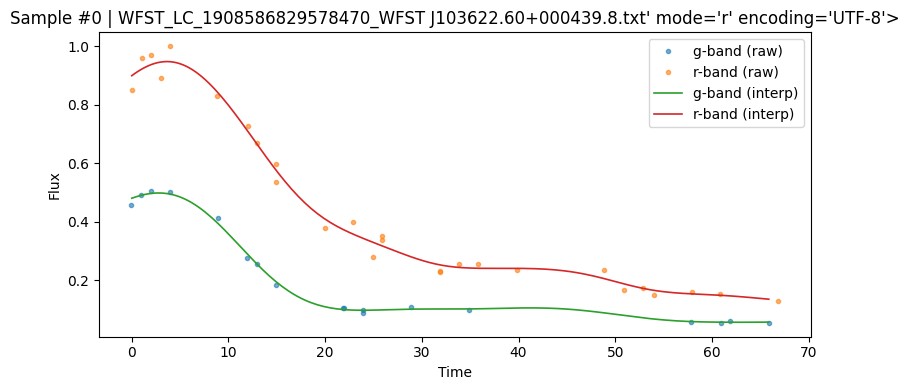

torch.Size([1, 200, 4])
---------------
../WFST超新星验证集/SN II/WFST_LC_1908586829578470_WFST J103622.60+000439.8.txt
[[0.0000 0.2204 0.3505 0.4241 0.0050 0.0001]]
---------------
[Multiband GP][Epoch 0] Loss: 0.8032
[Multiband GP][Epoch 100] Loss: -1.5099
[Multiband GP][Epoch 200] Loss: -1.5101
[Multiband GP] 提前早停于第 294 轮，Best Loss: -1.5097


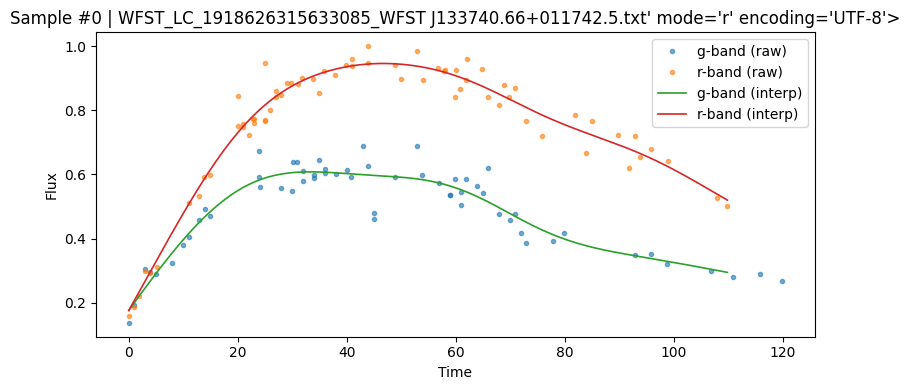

torch.Size([1, 200, 4])
---------------
../WFST超新星验证集/SN II/WFST_LC_1918626315633085_WFST J133740.66+011742.5.txt
[[0.0005 0.0043 0.0235 0.8987 0.0726 0.0004]]
---------------
[Multiband GP][Epoch 0] Loss: 0.8209
[Multiband GP][Epoch 100] Loss: -1.1674
[Multiband GP][Epoch 200] Loss: -1.1680
[Multiband GP][Epoch 300] Loss: -1.1680
[Multiband GP] 提前早停于第 346 轮，Best Loss: -1.1680


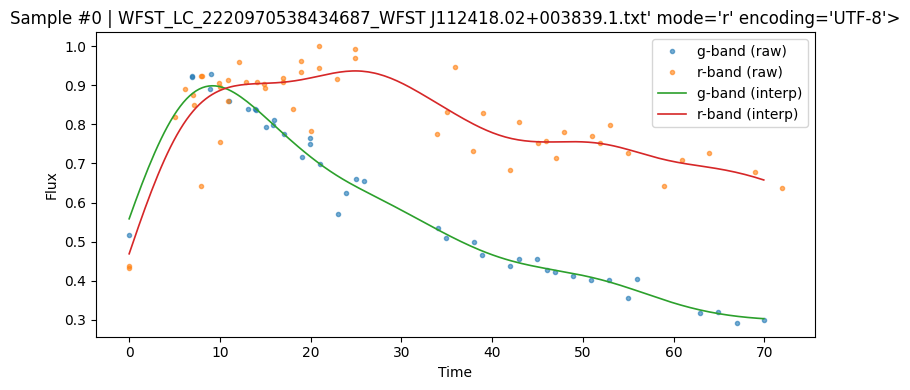

torch.Size([1, 200, 4])
---------------
../WFST超新星验证集/SN II/WFST_LC_2220970538434687_WFST J112418.02+003839.1.txt
[[0.0000 0.0023 0.0023 0.9943 0.0010 0.0001]]
---------------
[Multiband GP][Epoch 0] Loss: 0.8126
[Multiband GP][Epoch 100] Loss: -1.3110
[Multiband GP][Epoch 200] Loss: -1.3116
[Multiband GP] 提前早停于第 263 轮，Best Loss: -1.3109


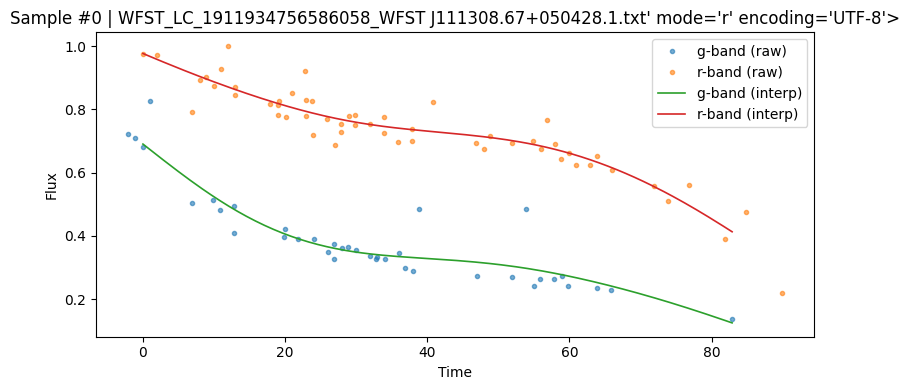

torch.Size([1, 200, 4])
---------------
../WFST超新星验证集/SN II/WFST_LC_1911934756586058_WFST J111308.67+050428.1.txt
[[0.0000 0.0024 0.0032 0.9934 0.0009 0.0001]]
---------------
[Multiband GP][Epoch 0] Loss: 1.1395
[Multiband GP][Epoch 100] Loss: -0.5436
[Multiband GP][Epoch 200] Loss: -0.5918
[Multiband GP][Epoch 300] Loss: -0.6017
[Multiband GP][Epoch 400] Loss: -0.6046
[Multiband GP][Epoch 500] Loss: -0.6059
[Multiband GP][Epoch 600] Loss: -0.6066
[Multiband GP][Epoch 700] Loss: -0.6070
[Multiband GP] 提前早停于第 734 轮，Best Loss: -0.6062


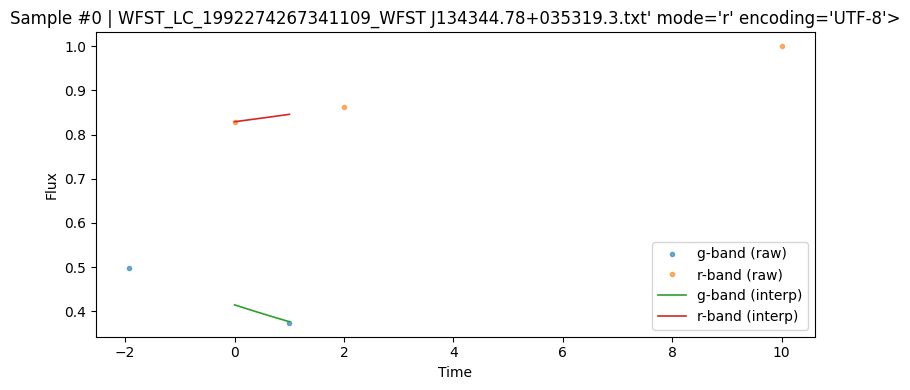

torch.Size([1, 200, 4])
---------------
../WFST超新星验证集/SN II/WFST_LC_1992274267341109_WFST J134344.78+035319.3.txt
[[0.0001 0.5580 0.1081 0.3295 0.0043 0.0001]]
---------------


In [27]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from scipy.interpolate import PchipInterpolator

import os
import json
import pywt
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


#模型加载，只要数据输入为5维均可
#model = MgMcFORMER(prop['multi_group'], 3, prop['seq_len'], prop['input_size'], prop['emb_size'], \
#                       prop['nhid'], prop['emb_size_c'], prop['nhid_c'], prop['nhead'], prop['nlayers'], prop['device'],
#                       prop['dropout']).to(prop['device'])

#model.load_state_dict(torch.load("test_model_ZTF.pth"))
#model.load_state_dict(torch.load("data/ZTF-12-(3)-未做数据增强/test_model_ZTF.pth"))
#model.load_state_dict(torch.load("data/ZTF-9(常规四分)/test_model_ZTF.pth"))
#model.load_state_dict(torch.load("data/ZTF-9(常规四分)/test_model_ZTF.pth"))
#model.load_state_dict(torch.load("效果比较好的模型/ZTF data/四分类-数据增强-TDE-AGN-SNIa-SNII.pth"))
#model.load_state_dict(torch.load("data/ZTF-12-(3)-未做数据增强/test_model_ZTF.pth"))
#model.load_state_dict(torch.load("效果比较好的模型/ZTF data/三分类-F1-92-流量归一化，输入维度5.pth"))
#model.load_state_dict(torch.load("data/ZTF-8(rising)/test_model_ZTF.pth"))


model.eval()  # Set to evaluation mode

def wavelet_denoise(signal, wavelet='db4', level=2, threshold_scale=1.0):
    # 小波分解
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    
    # 估算噪声阈值（使用最细层 detail 系数）
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = threshold_scale * sigma

    # 软阈值处理高频部分
    coeffs_thresh = [coeffs[0]]  # 保留 approximation 部分
    for detail in coeffs[1:]:
        coeffs_thresh.append(pywt.threshold(detail, threshold, mode='soft'))

    # 重构信号
    return pywt.waverec(coeffs_thresh, wavelet)

# 示例：对 fg 和 fr 平滑
def smooth_two_band(tg, fg, tr, fr, wavelet='db4', level=3):
    fg_smooth = wavelet_denoise(fg, wavelet=wavelet, level=level)
    fr_smooth = wavelet_denoise(fr, wavelet=wavelet, level=level)

    # 修剪长度匹配（小波重构后可能略长）
    fg_smooth = fg_smooth[:len(fg)]
    fr_smooth = fr_smooth[:len(fr)]

    return tg, fg_smooth, tr, fr_smooth




def plot_interpolation_debug(
    g_time_sorted, g_flux_sorted,
    r_time_sorted, r_flux_sorted,
    new_time_g, g_interp,
    new_time_r, r_interp,
    idx=None, filename=None, save=False, save_dir="./interp_fig/",
    invert_y=False
):
    import matplotlib.pyplot as plt
    import os

    plt.figure(figsize=(8, 4))
    plt.plot(g_time_sorted, g_flux_sorted, '.', label='g-band (raw)', alpha=0.6)
    plt.plot(r_time_sorted, r_flux_sorted, '.', label='r-band (raw)', alpha=0.6)
    plt.plot(new_time_g, g_interp, '-', label='g-band (interp)', linewidth=1.2)
    plt.plot(new_time_r, r_interp, '-', label='r-band (interp)', linewidth=1.2)

    plt.xlabel("Time")
    if invert_y==False:
        plt.ylabel("Flux")
    else:
        plt.ylabel("mag")
    plt.legend()

    

    title_str = f"Sample #{idx}" if idx is not None else ""
    if filename is not None:
        filename = str(filename)
        filename = filename.split('/')[-1]
        title_str += f" | {filename}"
    plt.title(title_str.strip())

    # ✅ 控制是否倒置 y 轴
    if invert_y:
        plt.gca().invert_yaxis()

    plt.tight_layout()

    if save:
        os.makedirs(save_dir, exist_ok=True)
        fname = filename.replace(".json", "") if filename else f"sample_{idx}"
        plt.savefig(f"{save_dir}/{fname}.png")
        plt.show()
    else:
        plt.show()

    plt.close()



class MLPInterpolator(nn.Module):
    def __init__(self, hidden_size=64):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, 1)
        )

    def forward(self, x):
        return self.model(x)

def interpolate_with_mlp(time_array, flux_array, new_time, epochs=1000, lr=1e-3, hidden_size=64, device=None):
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # 去除 NaN
    mask = ~np.isnan(flux_array)
    x = time_array[mask].reshape(-1, 1)
    y = flux_array[mask].reshape(-1, 1)

    if len(x) < 5:
        return PchipInterpolator(time_array, flux_array)(new_time)

    # 归一化
    t_min, t_max = x.min(), x.max()
    x_norm = (x - t_min) / (t_max - t_min)
    new_time_norm = (new_time.reshape(-1, 1) - t_min) / (t_max - t_min)

    y_mean, y_std = y.mean(), max(y.std(), 1e-3)
    y_norm = (y - y_mean) / y_std

    x_tensor = torch.tensor(x_norm, dtype=torch.float32, device=device)
    y_tensor = torch.tensor(y_norm, dtype=torch.float32, device=device)

    model = MLPInterpolator(hidden_size=hidden_size).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    for _ in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(x_tensor)
        loss = loss_fn(output, y_tensor)
        loss.backward()
        optimizer.step()

    # 预测
    new_time_tensor = torch.tensor(new_time_norm, dtype=torch.float32, device=device)
    with torch.no_grad():
        pred_norm = model(new_time_tensor).cpu().numpy()

    pred = pred_norm * y_std + y_mean
    return np.clip(pred.flatten(), 1e-6, np.max(flux_array) * 10)


def mean_standardize_fit(X):
    m1 = np.mean(X, axis=1)
    mean = np.mean(m1, axis=0)

    s1 = np.std(X, axis=1)
    std = np.mean(s1, axis=0)

    return mean, std


def mean_standardize_transform(X, mean, std):
    return (X - mean) / std


def preprocess(X_train,mean,std):
    mean, std = mean,std
    X_train = mean_standardize_transform(X_train, mean, std)

    X_train_task = torch.as_tensor(X_train).float()
    

    return X_train_task
def trans_flux_to_mag(flux):
    return -2.5*np.log10(flux/3631000)

import os
def WFST_path_reading_single(filename,model,rising_stage = False):
    # 读取txt文件
    file_path = filename  # 替换为你的txt文件路径
    data = []
    plot_counter = 0
    # 读取文件并提取数据
    with open(file_path, 'r') as file:
        for line in file:
            # 跳过前面注释行
            if line.startswith('#'):
                continue
            
            # 分割每行数据
            split_line = line.split()
            if len(split_line) < 4:
                continue
            
            mjd = float(split_line[0])
            flux = float(split_line[1])
            flux_err = float(split_line[2])
            band = split_line[3]
            
            # 只关注g和r波段的流量
            if band == 'g' or band == 'r':
                data.append([mjd, flux,flux_err, band])
    
    # 将数据转换为DataFrame，方便操作
    df = pd.DataFrame(data, columns=['MJD', 'Flux','Flux_err', 'Band'])
    
    # 分离g和r波段的数据
    g_data = df[df['Band'] == 'g']
    r_data = df[df['Band'] == 'r']
    
    # 确保时间排序
    g_data = g_data.sort_values(by='MJD')
    r_data = r_data.sort_values(by='MJD')
    
    # 去除负值点
    g_data = g_data[g_data['Flux'] > 0]
    r_data = r_data[r_data['Flux'] > 0]
    
    # 获取g和r波段的时间和流量
    time_g = g_data['MJD'].values
    flux_g = g_data['Flux'].values
    
    time_r = r_data['MJD'].values
    flux_r = r_data['Flux'].values

    flux_g_err = g_data['Flux_err'].values
    flux_r_err = r_data['Flux_err'].values

    f_max = max(np.max(flux_g),np.max(flux_r))

    tg = [];fg = [];tr = [];fr = []

    for i in range(len(time_g)):
        if flux_g[i]/flux_g_err[i]>5:
            tg.append(time_g[i]);
            #fg.append(trans_flux_to_mag(flux_g[i]))
            fg.append(flux_g[i]/f_max)

    for i in range(len(time_r)):
        if flux_r[i]/flux_r_err[i]>5:
            tr.append(time_r[i]);
            #fr.append(trans_flux_to_mag(flux_r[i]))
            fr.append(flux_r[i]/f_max)
            
    time_g,time_r,flux_g,flux_r = np.array(tg),np.array(tr),np.array(fg),np.array(fr)
    

    

    
        
    
    # 对时间的最大值和最小值进行插值，使长度为200
    time_min = min(time_g.min(), time_r.min())
    time_max = max(time_g.max(), time_r.max())

    s1 = max(time_g.min(), time_r.min())
    s2 = min(time_g.max(), time_r.max())
    s3 = min(time_g.min(), time_r.min())

    time_g = time_g - s1
    time_r = time_r - s1
    s2 -=s1

    #time_g,flux_g,time_r,flux_r = smooth_two_band(time_g,flux_g,time_r,flux_r)

    if rising_stage == True:
        
        # 对于上升段，需要取用观测开始之后15天内的数据，且需要卡住信噪比
        # 对于g波段
        valid_time_g = time_g <= np.inf
        time_g = time_g[valid_time_g]
        flux_g = flux_g[valid_time_g]
    
        # 对于r波段
        valid_time_r = time_r <= np.inf
        time_r = time_r[valid_time_r]
        flux_r = flux_r[valid_time_r]
        
        time_min = max(time_g.min(), time_r.min())
        time_max = min(time_g.max(), time_r.max())  
        
    
        new_time_g = np.linspace(time_min, time_min+20, 200)
        new_time_r = np.linspace(time_min, time_min+20, 200)
    else:
        min_max_time = min(np.max(time_r),np.max(time_g))
        max_min_time = max(np.min(time_r),np.min(time_g))
        new_time = np.linspace(max_min_time, min_max_time, 200)
        #new_time_g = np.linspace(np.min(time_g), np.max(time_g), 200)
        #new_time_r = np.linspace(np.min(time_r), np.max(time_r), 200)
        new_time_g = np.linspace(0, s2, 200)
        new_time_r = np.linspace(0, s2, 200)
    
    #print(new_time)

   
    
    # 插值g和r波段的流量
    new_g_flux = np.interp(new_time_g, time_g, flux_g)
    new_r_flux = np.interp(new_time_r, time_r, flux_r)
    #new_time,new_g_flux,new_r_flux = fit_and_inter(time_g,flux_g,time_r,flux_r)

    g_interp = new_g_flux;r_interp = new_r_flux
    
 
    upper_limit_flux = 10 * max(np.max(flux_g),np.max(flux_r))
    lower_limit_flux = 1e-3

    '''
    pchip_g = PchipInterpolator(time_g, flux_g,extrapolate=True)
    pchip_r = PchipInterpolator(time_r, flux_r,extrapolate=True)
    
    g_interp = pchip_g(new_time_g)
    g_interp = np.clip(g_interp,lower_limit_flux, upper_limit_flux)

    r_interp = pchip_r(new_time_r)
    r_interp = np.clip(r_interp,lower_limit_flux, upper_limit_flux)
    '''

    

    #g_interp = interpolate_with_mlp(np.array(time_g), np.array(flux_g), new_time_g,device="cuda",epochs=1000)
    #r_interp = interpolate_with_mlp(np.array(time_r), np.array(flux_r), new_time_r,device="cuda",epochs=1000)

    min_flux = min(np.min(flux_g),np.min(flux_r))
    max_flux = max(np.max(flux_g),np.max(flux_r))
    #flux_g = (flux_g - min_flux) / (max_flux-min_flux)
    #flux_r = (flux_r - min_flux) / (max_flux-min_flux)
    
    g_interp, r_interp = safe_multiband_gp_interpolate(
                    time_g, flux_g,
                    time_r, flux_r,
                    new_time_g, new_time_r,
                    epochs=800,
                    device="cuda"
                )
    
    
    fg = np.clip(g_interp,lower_limit_flux, upper_limit_flux)
    fr = np.clip(r_interp,lower_limit_flux, upper_limit_flux)
    tg = new_time_g
    tr = new_time_r

    

    

    plot_interpolation_debug(
                                time_g, flux_g,
                                time_r, flux_r,
                                tg, fg,
                                tr, fr,
                                idx=plot_counter,
                                save=False,
                                filename=file
                                )
    plot_counter += 1
    

    # 最大值归一化
    

    
    
    # 计算log10流量
    log_g_flux = np.log10(abs(g_interp))+2.44
    log_r_flux = np.log10(abs(r_interp))+2.44
    
    # 组合成最终的numpy数组，时间在第一列，g和r波段流量分别在第二和第三列
    #final_data = np.vstack((new_time_g - np.min(time_g), g_interp  / max_flux, r_interp  / max_flux,(g_interp-r_interp)/max_flux)).T
    final_data = np.vstack((tg, fg  ,tr, fr )).T

    #print(final_data)
    
    # 输出最终的结果
    final_data = np.array(final_data)

    
    
    final_data=np.expand_dims(final_data, axis=0) 
    final_data = final_data.astype(np.float32)

    #归一化
    final_data = preprocess(final_data,mean_1,std_1)
    print(final_data.shape)
    
    dataloader_train, dataloader_test = toDataloader(prop, final_data,[0], final_data, [0])
    
    
    model.eval()
    
    
    final_data = DataLoader(final_data,batch_size = 1)
    
    label,output = test_model(model, dataloader_test, nclasses, device="cuda:0")
    outputs_np = torch.argmax(torch.cat(output), dim=-1).cpu().numpy() 
    #print(output)
    #print(output)
    probabilities = F.softmax(output[0], dim=1)
    rounded_probs = np.round(probabilities.detach().cpu().numpy(), 4)

    # 设置打印格式，关闭科学计数法
    np.set_printoptions(suppress=True, precision=4, floatmode='fixed')

    
    print('---------------')
    print(filename)
    print(rounded_probs)
    print('---------------')
    

    return [outputs_np,filename]

def WFST_ck(file_path,model,rising_stage = False):
    directory_path = file_path  # 替换为你的目标目录路径
    result_ls = []
    # 遍历目录，找到所有的 .txt 文件
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".txt"):
                #try:
                    # 构造完整文件路径
                    file_path = os.path.join(root, file)
                    
                    # 调用函数处理每个文件
                    sg  = WFST_path_reading_single(file_path,model,rising_stage = rising_stage)
                    result_ls.append(sg)
                #except ValueError:
                #    print("?")
                #    pass
    return result_ls


res = WFST_ck("../WFST超新星验证集/SN II",model,rising_stage =False)
#print(model)

In [28]:
print(len(res)," total")
#print(res[1][0])
k=0
for i in range(len(res)):
    
    
    if res[i][0] == 0 and np.isnan(res[i][0])==False:
        #print(res[i][0])
        k += 1

print("Count of elements where the first value is TDE:", k)


k=0
for i in range(len(res)):
    
    
    if res[i][0] == 1:
        #print(res[i][0])
        k += 1

print("Count of elements where the first value is SN Ia:", k)

k=0
for i in range(len(res)):
    
    
    if res[i][0] == 3:
        #print(res[i][0])
        k += 1

print("Count of elements where the first value is SN II:", k)


k=0
for i in range(len(res)):
    
    
    if res[i][0] == 2:
        #print(res[i][0])
        k += 1

print("Count of elements where the first value is SN Ib/c:", k)


k=0
for i in range(len(res)):
    
    
    if res[i][0] == 4:
        #print(res[i][0])
        k += 1

print("Count of elements where the first value is SLSN:", k)

k=0
for i in range(len(res)):
    
    
    if res[i][0] == 5:
        #print(res[i][0])
        k += 1

print("Count of elements where the first value is AGN:", k)

5  total
Count of elements where the first value is TDE: 0
Count of elements where the first value is SN Ia: 1
Count of elements where the first value is SN II: 4
Count of elements where the first value is SN Ib/c: 0
Count of elements where the first value is SLSN: 0
Count of elements where the first value is AGN: 0


# 以下是对于插值方法的探讨

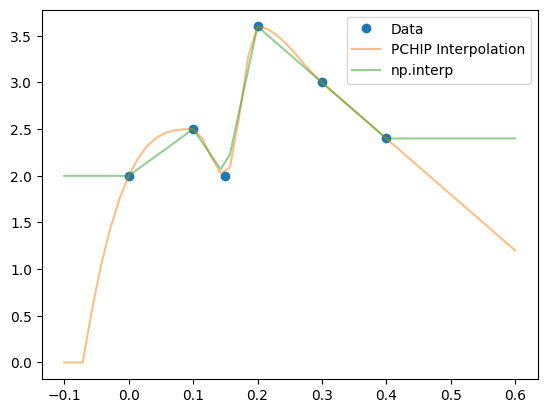

In [15]:
from scipy.interpolate import PchipInterpolator
import matplotlib.pyplot as plt

# 原始数据
x = np.array([0,0.1,0.15, 0.2, 0.3, 0.4])
y = np.array([2.0,2.5,2.0, 3.6, 3.0,2.4])

lower_bound = 0.0001  # 选择数据的最小值作为下限
upper_bound = np.max(y)  # 选择数据的最大值作为上限
# PCHIP 插值
pchip = PchipInterpolator(x, y,extrapolate=True)
x_new = np.linspace(-0.1, 0.6, 50)
y_new = pchip(x_new)
y_new = np.clip(y_new,lower_bound, upper_bound)
y_new1 = np.interp(x_new,x,y)


plt.plot(x, y, 'o', label='Data')
plt.plot(x_new, y_new, '-', label='PCHIP Interpolation',alpha=0.5)
plt.plot(x_new, y_new1, '-', label='np.interp',alpha=0.5)
plt.legend()
plt.show()


In [20]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

#mean_1 = np.array([2.58541981 ,0.03422268, 3.48849084, 0.04991302])
#std_1 = np.array([ 8.4326514 ,  0.13886326 ,10.67072193 , 0.16889779])

#mean_1 = np.array([10.61222525,  0.04127767, 11.33922096,  0.06068008])
#std_1 = np.array([17.60006785,  0.14359761, 20.77293644,  0.17970372])

def mean_standardize_fit(X):
    m1 = np.mean(X, axis=1)
    mean = np.mean(m1, axis=0)

    s1 = np.std(X, axis=1)
    std = np.mean(s1, axis=0)

    return mean, std


def mean_standardize_transform(X, mean, std):
    return (X - mean) / std


def preprocess(X_train,mean=mean_1,std=std_1):
    mean, std = mean,std
    X_train = mean_standardize_transform(X_train, mean, std)

    X_train_task = torch.as_tensor(X_train).float()
    

    return X_train_task

import os
def WFST_path_reading_single(filename,model):
    # 读取txt文件
    file_path = filename  # 替换为你的txt文件路径
    data = []
    
    # 读取文件并提取数据
    with open(file_path, 'r') as file:
        for line in file:
            # 跳过前面注释行
            if line.startswith('#'):
                continue
            
            # 分割每行数据
            split_line = line.split()
            if len(split_line) < 4:
                continue
            
            mjd = float(split_line[0])
            flux = float(split_line[1])
            flux_err = float(split_line[2])
            band = split_line[3]
            
            # 只关注g和r波段的流量
            if band == 'g' or band == 'r':
                data.append([mjd, flux, flux_err,band])
    
    # 将数据转换为DataFrame，方便操作
    df = pd.DataFrame(data, columns=['MJD', 'Flux', 'Flux_err','Band'])
    
    # 分离g和r波段的数据
    g_data = df[df['Band'] == 'g']
    r_data = df[df['Band'] == 'r']
    
    # 确保时间排序
    g_data = g_data.sort_values(by='MJD')
    r_data = r_data.sort_values(by='MJD')
    
    # 去除负值点
    g_data = g_data[g_data['Flux'] > 0]
    r_data = r_data[r_data['Flux'] > 0]
    
    # 获取g和r波段的时间和流量
    time_g = g_data['MJD'].values
    flux_g = g_data['Flux'].values
    flux_g_err = g_data['Flux_err'].values
    
    time_r = r_data['MJD'].values
    flux_r = r_data['Flux'].values
    flux_r_err = r_data['Flux_err'].values

    max_flux = max(max(flux_g), max(flux_r))
    
    # 对时间的最大值和最小值进行插值，使长度为200
    time_min = min(time_g.min(), time_r.min())
    time_max = max(time_g.max(), time_r.max())

    tg = np.zeros(200);fg = np.zeros(200);non_zero_flux = [];non_zero_mjd = []
    for i in range(len(time_g)):
        if flux_g[i]/flux_g_err[i]>5 and flux_g[i]>0.01:
            tg[i] = time_g[i]
            fg[i] = flux_g[i]
            non_zero_flux.append(flux_g[i])
            non_zero_mjd.append(time_g[i])

    tr = np.zeros(200);fr = np.zeros(200)
    for i in range(len(time_r)):
        if flux_r[i]/flux_r_err[i]>5 and flux_r[i]>0.01:
            tr[i] = time_r[i]
            fr[i] = flux_r[i]
            non_zero_flux.append(flux_r[i])
            non_zero_mjd.append(time_r[i])

    time_min = np.min(non_zero_mjd)
    time_max = np.max(non_zero_mjd)
    flux_max = np.max(non_zero_flux)
    flux_min = np.min(non_zero_flux)

    flux_max = max(np.max(flux_g),np.max(flux_r))

    
    
    for i in range(len(tr)):
        if tr[i]!=0:
            tr[i] -= time_min
            fr[i] = (fr[i] - 0)/(flux_max - 0)

    for i in range(len(fg)):
        if tg[i]!=0:
            tg[i] -= time_min
            fg[i] = (fg[i] - 0)/(flux_max - 0)

    tr_new = [];fr_new = [];tg_new = [];fg_new = []

    t_max = max(np.max(tg),np.max(tr))
    t_min_max = min(np.max(tg),np.max(tr))
    #print(t_max)
    #如果是遴选上升段那么就在这个地方进行处理，添加如下条件：tg[i]-t_max>-15
    for i in range(len(tg)):
        if fg[i]!=0 :
            tg_new.append(tg[i])
            fg_new.append(fg[i])

    for i in range(len(tr)):
        if fr[i]!=0 :
            tr_new.append(tr[i])
            fr_new.append(fr[i])

    t_min = min(np.min(tg_new),np.min(tr_new))
    for i in range(len(tr_new)):
        tr_new[i] -= t_min
    for i in range(len(tg_new)):
        tg_new[i] -= t_min

    new_time = np.linspace(0, t_min_max, 200)

    g_interp = np.interp(new_time, tg_new, fg_new)
    r_interp = np.interp(new_time, tr_new, fr_new)

    
    while len(tr_new)<200:
        tr_new.append(0)
        fr_new.append(0)

    while len(tg_new)<200:
        tg_new.append(0)
        fg_new.append(0)
    
    
    #new_time = np.linspace(time_min, time_min+15, 200)
    
    
    # 插值g和r波段的流量
    #new_g_flux = np.interp(new_time, time_g, flux_g)
    #new_r_flux = np.interp(new_time, time_r, flux_r)
    
    # 最大值归一化
    #max_flux = max(max(new_g_flux), max(new_r_flux))
    
    # 计算log10流量
    #log_g_flux = np.log10(new_g_flux)
    #log_r_flux = np.log10(new_r_flux)
    
    # 组合成最终的numpy数组，时间在第一列，g和r波段流量分别在第二和第三列
    final_data = np.vstack((tg_new , fg_new ,tr_new , fr_new )).T
    #final_data = np.vstack((new_time , g_interp ,r_interp , g_interp-r_interp )).T
    #print(final_data)
    # 输出最终的结果
    final_data = np.array(final_data)
    #print(final_data)

    
    
    final_data=np.expand_dims(final_data, axis=0) 
    #final_data = final_data.astype(np.float32)

    #归一化
    final_data = preprocess(final_data,mean_1,std_1)
    #print(final_data.shape)
    #print(final_data.shape)
    
    dataloader_train, dataloader_test = toDataloader(prop, final_data,[0], final_data, [0])
    
    
    model.eval()
    
    
    final_data = DataLoader(final_data,batch_size = 1)
    
    label,output = test_model(model, dataloader_test, nclasses, device="cuda:0")
    outputs_np = torch.argmax(torch.cat(output), dim=-1).cpu().numpy() 
    #print(output)
    #print(output)
    probabilities = F.softmax(output[0],dim=1)
    print(filename)
    np.set_printoptions(precision=4, suppress=True)
    print(probabilities.cpu().numpy())
    

    return [outputs_np,filename]

def WFST_ck(file_path,model):
    directory_path = file_path  # 替换为你的目标目录路径
    result_ls = []
    # 遍历目录，找到所有的 .txt 文件
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".txt"):
                try:
                    # 构造完整文件路径
                    file_path = os.path.join(root, file)
                    
                    # 调用函数处理每个文件
                    sg  = WFST_path_reading_single(file_path,model)
                    result_ls.append(sg)
                except ValueError:
                    print("?")
                    pass
    return result_ls


res = WFST_ck("../WFST超新星验证集/SN II",model)
#res = WFST_ck("../WFST_SN+TDE",model)
#print(model)

../WFST超新星验证集/SN II/WFST_LC_1908586829578470_WFST J103622.60+000439.8.txt
[[0.0004 0.3992 0.5752 0.0224 0.0029 0.    ]]
../WFST超新星验证集/SN II/WFST_LC_1918626315633085_WFST J133740.66+011742.5.txt
[[0.0003 0.0057 0.9823 0.0027 0.009  0.    ]]
../WFST超新星验证集/SN II/WFST_LC_2220970538434687_WFST J112418.02+003839.1.txt
[[0.0001 0.0048 0.9823 0.0041 0.0086 0.    ]]
../WFST超新星验证集/SN II/WFST_LC_1911934756586058_WFST J111308.67+050428.1.txt
[[0.0001 0.0015 0.9779 0.0046 0.0157 0.0001]]
../WFST超新星验证集/SN II/WFST_LC_1992274267341109_WFST J134344.78+035319.3.txt
[[0.0002 0.1616 0.4266 0.395  0.0164 0.0003]]


In [25]:
print(len(res)," total")
print(res[1][0])
k=0
for i in range(len(res)):
    
    
    if res[i][0] == 0:
        #print(res[i][0])
        k += 1

print("Count of elements where the first value is TDE:", k)

k=0
for i in range(len(res)):
    
    
    if res[i][0] == 1:
        #print(res[i][0])
        k += 1

print("Count of elements where the first value is SN Ia:", k)

k=0
for i in range(len(res)):
    
    
    if res[i][0] == 2:
        #print(res[i][0])
        k += 1

print("Count of elements where the first value is SN II:", k)

10  total
[1]
Count of elements where the first value is TDE: 0
Count of elements where the first value is SN Ia: 9
Count of elements where the first value is SN II: 1
